Group Members

Arlo Werner Roos            577441

Nkosinathi Owen Mabena      577732

Justin Gibbon               577407

Mphela Napo                 578379

Morne Bosch                 577323

Maropeng Sebati             578036


Problem Statement

In our modernday society evrything has turned to subscription based models. These ubscriptions can be cancelled at anytime thus it is of utter importance for companies to be able to predict if a customer is liely to cancell their subscription or not. To solve this problem we will be creatind and trainign a model to be able to predict how likely a customer is to cancell their subscription.

Data That will be used

The data used for this oroject is public and sourced by IBM. It is available at https://github.com/IBM/telco-customer-churn-on-icp4d. This data is from a fictional telecomunication company called Telco. This data gives us details about the customer and wheter or not they have churned.We will thus be using it for our dataset.


We will first start of by importign our libraries.

In [2]:
import numpy as np
import pandas as pd
# pd.set_option('display.max_columns', None)
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

telco_df = pd.read_csv("data/churn.csv")
telco_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can now see how our data looks.Lets see what data types we will be dealing with but as we can see it is not very complete.We will now create a function to give a summary of the dataset.

In [3]:
def DSummary(df, message):
    print(f'{message}:n')
    print('Total rows : ', df.shape[0])
    print("Total Features:", df.shape[1])
    print("Features:")
    print(df.columns.tolist())
    print(" Missing Values:", df.isnull().sum().values.sum())
    print(" Unique Values:")
    print(df.nunique())

DSummary(telco_df, 'Summary of Telco data')

Summary of Telco data:n
Total rows :  7043
Total Features: 21
Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
 Missing Values: 0
 Unique Values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<Axes: title={'center': 'Churn Rate'}, ylabel='count'>

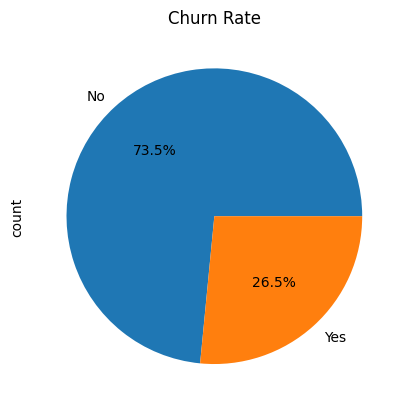

In [4]:
telco_df['Churn'].value_counts().plot.pie(title='Churn Rate',autopct='%1.1f%%')

As we can see from the pie graph above, most of the customers do not infact cancell their subscriptions

We will now conduct a data analysis into all of the independant categorical variables.Firstly we will look inot the dofferent demgraphics vs the churn rate.We will be using these crosstab graphs as even thoough they do not give counts they display values relatively to each other thus it is easier to judge what has the bigger impact without being misled.

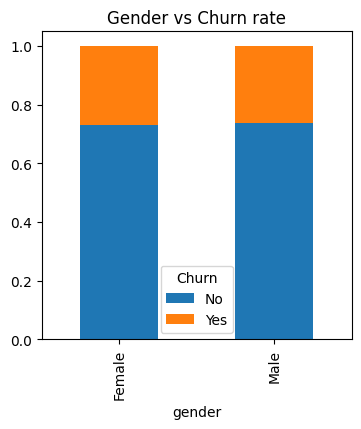

In [5]:
Gender=pd.crosstab(telco_df['gender'],telco_df['Churn'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Gender vs Churn rate')
plt.show()
SeniorCitizen=pd.crosstab(telco_df['SeniorCitizen'],telco_df['Churn'])


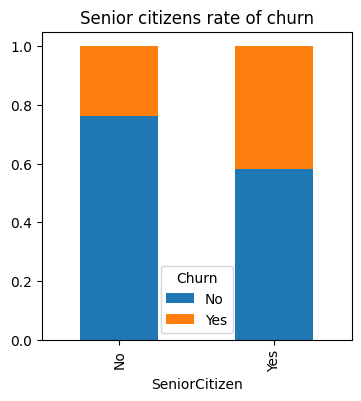

In [6]:
telco_df.loc[telco_df.SeniorCitizen==0,'SeniorCitizen'] = "No"  
telco_df.loc[telco_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
SeniorCitizen=pd.crosstab(telco_df['SeniorCitizen'],telco_df['Churn'])
SeniorCitizen.div(SeniorCitizen.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Senior citizens rate of churn')
plt.show()

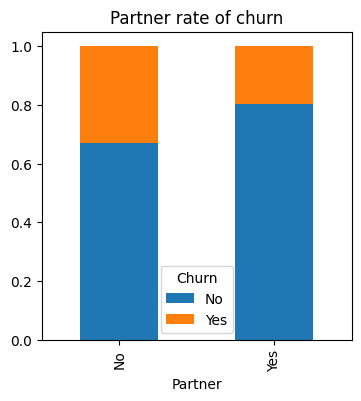

In [7]:
Partner=pd.crosstab(telco_df['Partner'],telco_df['Churn'])
Partner.div(Partner.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Partner rate of churn')
plt.show()

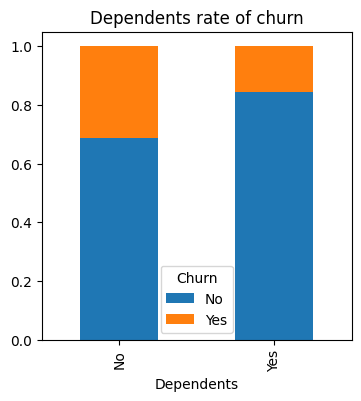

In [8]:
Dependents=pd.crosstab(telco_df['Dependents'],telco_df['Churn'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Dependents rate of churn')
plt.show()

From our analysis into the diffenrent demographics we can see that people with no dependants are more likely to churn as well as customers with no partners and senior citizens.

After we have now analysed the demographic we can analyse the different services and the curn rates thereof

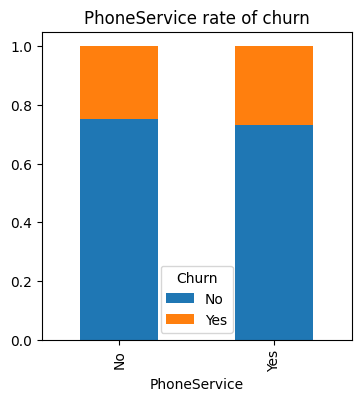

In [9]:
PhoneService=pd.crosstab(telco_df['PhoneService'],telco_df['Churn'])
PhoneService.div(PhoneService.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='PhoneService rate of churn')
plt.show()

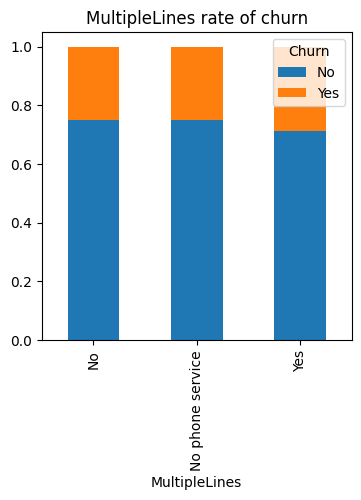

In [10]:
MultipleLines=pd.crosstab(telco_df['MultipleLines'],telco_df['Churn'])
MultipleLines.div(MultipleLines.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='MultipleLines rate of churn')
plt.show()

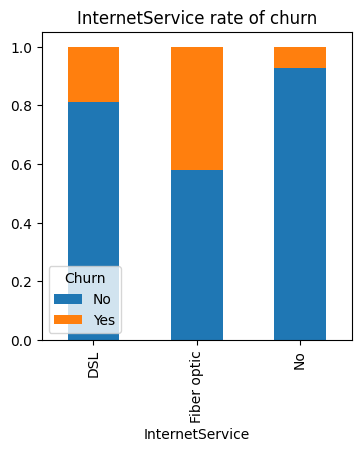

In [11]:
InternetService=pd.crosstab(telco_df['InternetService'],telco_df['Churn'])
InternetService.div(InternetService.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='InternetService rate of churn')
plt.show()

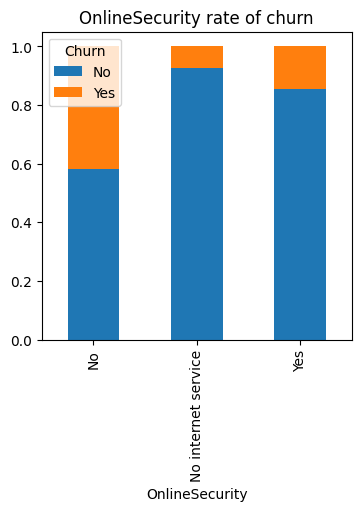

In [12]:
OnlineSecurity=pd.crosstab(telco_df['OnlineSecurity'],telco_df['Churn'])
OnlineSecurity.div(OnlineSecurity.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='OnlineSecurity rate of churn')
plt.show()

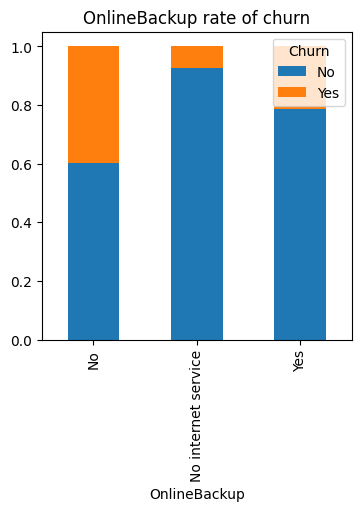

In [13]:
OnlineBackup=pd.crosstab(telco_df['OnlineBackup'],telco_df['Churn'])
OnlineBackup.div(OnlineBackup.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='OnlineBackup rate of churn')
plt.show()

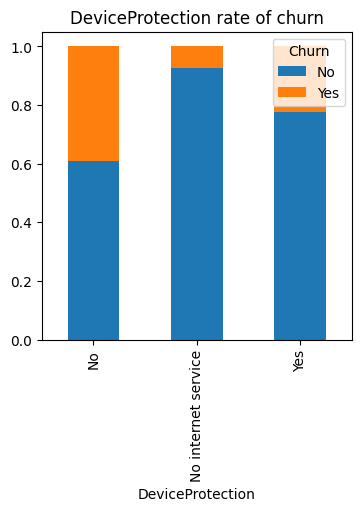

In [14]:
DeviceProtection=pd.crosstab(telco_df['DeviceProtection'],telco_df['Churn'])
DeviceProtection.div(DeviceProtection.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='DeviceProtection rate of churn')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

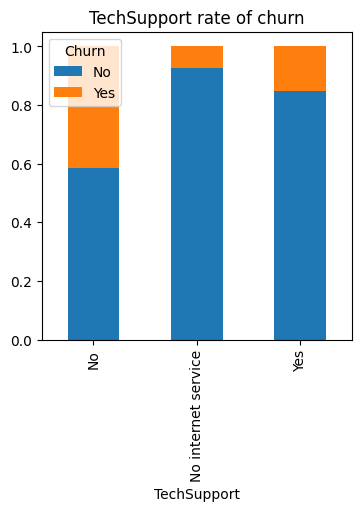

In [15]:
TechSupport=pd.crosstab(telco_df['TechSupport'],telco_df['Churn'])
TechSupport.div(TechSupport.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='TechSupport rate of churn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

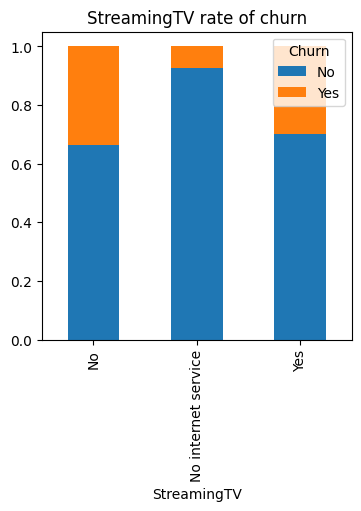

In [16]:
StreamingTV=pd.crosstab(telco_df['StreamingTV'],telco_df['Churn'])
StreamingTV.div(StreamingTV.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='StreamingTV rate of churn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

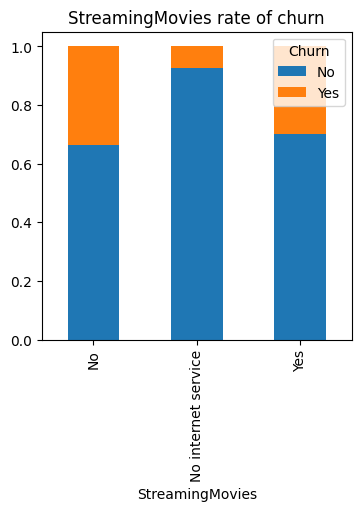

In [17]:
StreamingMovies=pd.crosstab(telco_df['StreamingMovies'],telco_df['Churn'])
StreamingMovies.div(StreamingMovies.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='StreamingMovies rate of churn')
plt.show

From the analysis of the streaming services we can now see that phone service does not have a large impact on rate of churn.People with multiple lines are a bit more likely to churn.Customers with fibre optic churns much more often than the others. Customers with  OnlineSecurity, OnlineBackup,TechSupport and DeviceProtection  are more unlikely to churn.Streaming tv and streaming movies crosstab tables are basically the same so we ca see that they are nor predicitave of rate of churn.

We now need to analyze the three different payment methods and their corresonding rates of churn.

<function matplotlib.pyplot.show(close=None, block=None)>

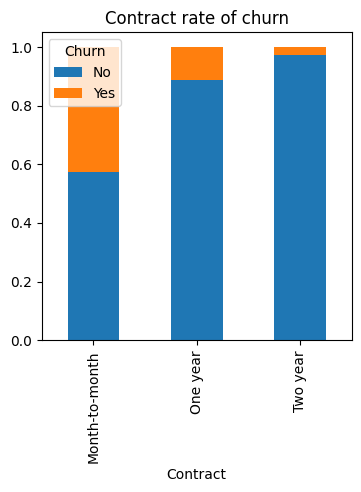

In [18]:
Contract=pd.crosstab(telco_df['Contract'],telco_df['Churn'])
Contract.div(Contract.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Contract rate of churn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

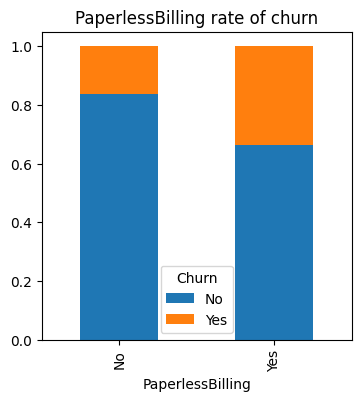

In [19]:
PaperlessBilling=pd.crosstab(telco_df['PaperlessBilling'],telco_df['Churn'])
PaperlessBilling.div(PaperlessBilling.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='PaperlessBilling rate of churn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

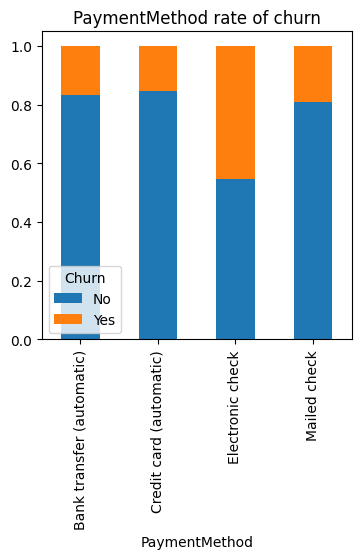

In [20]:
PaymentMethod=pd.crosstab(telco_df['PaymentMethod'],telco_df['Churn'])
PaymentMethod.div(PaymentMethod.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='PaymentMethod rate of churn')
plt.show

From this analysis we can now see that people who pay with electronic check are much more likely to churn as well as month to month clients and those who do paperless billing

The numeric features now need to be analysed.These are the total charges,monthly charges and tenure. we will firstly ensure that they are in fact classified as numerical values by looking at the data types.

In [21]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From this we can see that total charges is classified as an object where ot should be numerical. We will then firstly start by fixing this error.

In [22]:
telco_df['TotalCharges']= pd.to_numeric(telco_df['TotalCharges'],errors='coerce')
telco_df['TotalCharges']= telco_df['TotalCharges'].fillna(telco_df['TotalCharges'].median())